In [1]:
import sys
import os

sys.path.append(os.getcwd())

In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
import scipy.io as sio
import matplotlib.pyplot as plt

from datasets.feature_dataset import FeatureDataset
from datasets.resnet_dataset import ResnetDataset
from dataloaders.CUBLoader import CUBFeatDataSet
import utils.knn as knn

/opt/conda/lib/python3.7/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
[nltk_data] Downloading package punkt to /home/jupyter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
train_dataset = ResnetDataset(split='easy')
img_feat, cl, rl, txt_feat = train_dataset.get_all_data()

In [4]:
img_feat.shape

(8855, 2048)

In [5]:
cl.shape

(8855,)

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(img_feat)
X_scaled = scaler.transform(img_feat)

In [7]:
img_feat.shape

(8855, 2048)

In [8]:
from sklearn.manifold import TSNE

In [9]:
img_feat_embedded = TSNE(n_components=2).fit_transform(X_scaled)

In [10]:
img_feat_embedded.shape

(8855, 2)

In [11]:
tsne = img_feat_embedded

In [12]:
def scale(x):
    return (x-np.min(x))/(np.max(x) - np.min(x))

In [13]:
tx = tsne[:, 0]
ty = tsne[:, 1]

In [14]:
tx = scale(tx)
ty = scale(ty)
tx.shape, ty.shape

((8855,), (8855,))

In [15]:
import matplotlib.pyplot as plt

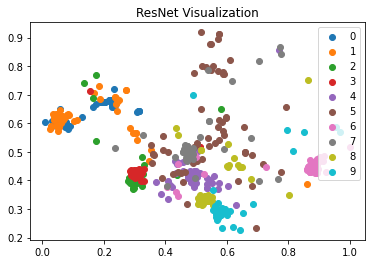

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)

labels = np.unique(cl)[:10]

for l in labels:
    mask = cl == l
    curr_tx, curr_ty = tx[mask], ty[mask]
    ax.scatter(curr_tx, curr_ty, label=l)

ax.set_title('ResNet Visualization')
ax.legend(loc='best')
# plt.show()
plt.savefig('plots/ResNet_easy.png')

In [17]:
# VPDE
plt.clf()

<Figure size 432x288 with 0 Axes>

In [18]:
VPDE_dataset = CUBFeatDataSet(folder_path='data/CUB2011_2', split='easy', model='vanilla', train=True)

In [19]:
img_feat_vpde, cl_vpde, rl_vpde, txt_feat_vpde = VPDE_dataset.get_all_data()

In [20]:
img_feat_vpde.shape, cl_vpde.shape

((8855, 3584), (8855,))

In [21]:
scaler_vpde = StandardScaler()
scaler_vpde.fit(img_feat_vpde)
X_scaled_vpde = scaler_vpde.transform(img_feat_vpde)

In [22]:
img_feat_embedded_vpde = TSNE(n_components=2).fit_transform(X_scaled_vpde)

In [23]:
img_feat_embedded_vpde.shape

(8855, 2)

In [24]:
tsne_vpde = img_feat_embedded_vpde

In [25]:
tx_vpde = tsne_vpde[:, 0]
ty_vpde = tsne_vpde[:, 1]

In [26]:
tx_vpde = scale(tx_vpde)
ty_vpde = scale(ty_vpde)
tx_vpde.shape, ty_vpde.shape

((8855,), (8855,))

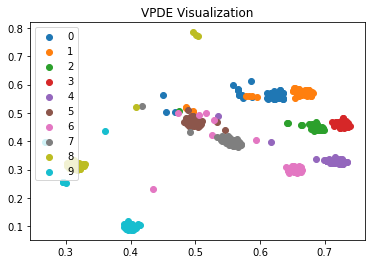

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)

labels_vpde = np.unique(cl_vpde)[:10]

for l in labels_vpde:
    mask = cl_vpde == l
    curr_tx_vpde, curr_ty_vpde = tx_vpde[mask], ty_vpde[mask]
    ax.scatter(curr_tx_vpde, curr_ty_vpde, label=l)

ax.set_title('VPDE Visualization')
ax.legend(loc='best')
plt.savefig('plots/VPDE_easy.png')

In [28]:
def tsne_plot_image(dataset):
    img_feat, cl, rl, txt_feat = dataset.get_all_data()
    
    scaler = StandardScaler()
    scaler.fit(img_feat)
    X_scaled = scaler.transform(img_feat)
    
    tsne = TSNE(n_components=2).fit_transform(X_scaled)
    
    tx = tsne[:, 0]
    ty = tsne[:, 1]
    
    tx = scale(tx)
    ty = scale(ty)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)

    labels = np.unique(cl)[:10]

    for l in labels:
        mask = cl == l
        curr_tx, curr_ty = tx[mask], ty[mask]
        ax.scatter(curr_tx, curr_ty, label=l)

    ax.legend(loc='best')
    plt.show()


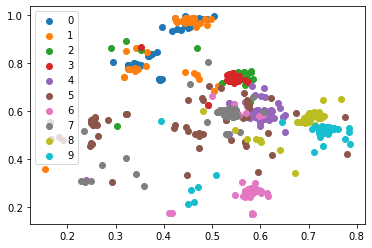

In [29]:
tsne_plot_image(train_dataset)

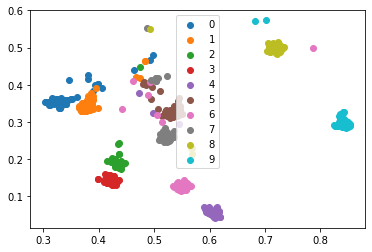

In [30]:
tsne_plot_image(VPDE_dataset)